#ML - Study Group #3:
*   NAMA: Janiar Rahma Putri
*   JURUSAN: S1 Teknik Telekomunikasi
*   NIM: 101012300091







**Content**
Data ini diunduh dari situs web Hass Avocado Board pada bulan Mei 2018 & dikompilasi menjadi satu CSV. Berikut adalah cara Hass Avocado Board menjelaskan data di situs web mereka:

Tabel di bawah ini menunjukkan data pemindaian ritel mingguan 2018 untuk volume ritel nasional (unit) dan harga. Data pemindaian ritel berasal langsung dari mesin kasir pengecer berdasarkan penjualan ritel aktual alpukat Hass. Dimulai pada tahun 2013, tabel di bawah ini mencerminkan kumpulan data ritel multi-outlet yang diperluas. Pelaporan multi-outlet mencakup agregasi dari saluran berikut: grosir, massal, klub, obat-obatan, dolar, dan militer. Harga Rata-rata (alpukat) pada tabel mencerminkan biaya per unit (per alpukat), bahkan ketika beberapa unit (alpukat) dijual dalam kantong. Kode Pencarian Produk (PLU) pada tabel hanya untuk alpukat Hass. Varietas alpukat lainnya (misalnya alpukat greenskin) tidak termasuk dalam tabel ini.

Beberapa kolom yang relevan dalam set data:

* Date - The date of the observation
*   AveragePrice - the average price of a single avocado
*   type - conventional or organic
*   year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

## Import Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

Proses Import menggunakan URL GitHub

In [2]:
url = 'https://raw.githubusercontent.com/mike-laccavole/avocado-prices/refs/heads/master/avocado.csv'
df = pd.read_csv(url)

Proses Import Lokal (Manual)

In [3]:
# Proses Import Lokal (1)
df = pd.read_csv('./avocadoPrice.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Overview Dataset

In [30]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [31]:
df.sample(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
736,8,2015-11-01,0.91,205592.10,3731.64,147281.28,8605.43,45973.75,43392.69,1757.12,823.94,conventional,GrandRapids,2015,11,1
1847,27,2015-06-21,1.08,1921720.44,1049002.63,474166.48,22901.69,375649.64,358605.35,15767.87,1276.42,conventional,Plains,2015,6,21
12778,13,2016-09-25,1.91,6840.51,175.79,157.45,24.90,6482.37,6473.88,8.49,0.00,organic,HarrisburgScranton,2016,9,25


### Check Number of rows and columns in the dataset

In [8]:
# Menampilkan bentuk dari data: (Baris, Kolom)
df.shape

(18249, 14)

In [10]:
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 18249
Jumlah Kolom: 14


###Check the data type of each column

In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [13]:
df.dtypes

,0
Unnamed: 0,int64
Date,object
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


###Check missing value pada setiap kolom

In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


###Check duplicated value

In [17]:
df.duplicated().sum()

0

###Split Date into Month, Year, and Day

In [18]:
# Cek Tipe Data pada Date (object)
df.dtypes

,0
Unnamed: 0,int64
Date,object
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


In [19]:
# Konversi tipe data 'Date' jadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


In [20]:
# Membagi nilai didalam kolom Date menjadi: Year, Month, dan Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


In [21]:
# Menghapus kolom year
df.drop('year', axis=1, inplace=True)
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


###Number of Each Category

In [22]:
df['region'].value_counts()

,count
region,
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338


In [23]:
df[['region', 'type']].value_counts()

region              type        
Albany              conventional    169
Pittsburgh          conventional    169
Roanoke             organic         169
                    conventional    169
RichmondNorfolk     organic         169
                                   ... 
HarrisburgScranton  conventional    169
GreatLakes          organic         169
                    conventional    169
GrandRapids         organic         169
WestTexNewMexico    organic         166
Name: count, Length: 108, dtype: int64

In [24]:
df['region'].count()

18249

## Checking the Chart

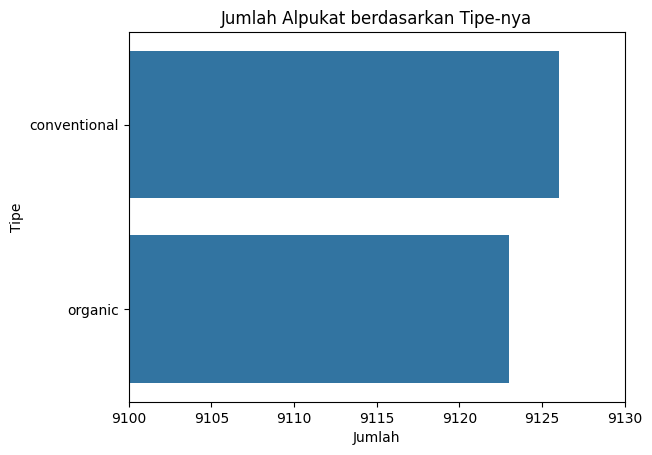

In [28]:
sns.countplot(y='type', data=df)

plt.title("Jumlah Alpukat berdasarkan Tipe-nya")
plt.ylabel("Tipe")
plt.xlabel("Jumlah")
plt.xlim(9100, 9130)

plt.show()

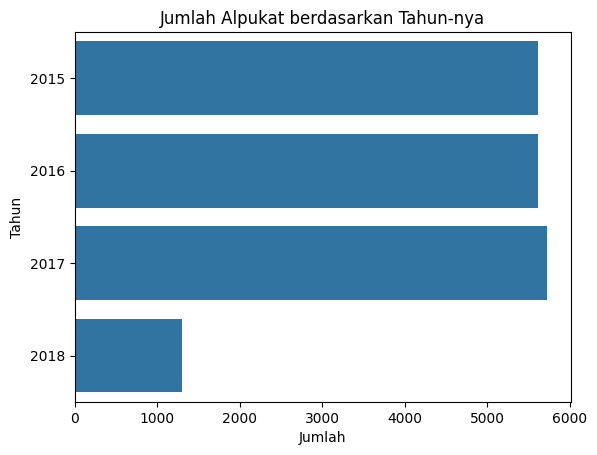

In [32]:
sns.countplot(y='Year', data=df)

plt.title("Jumlah Alpukat berdasarkan Tahun-nya")
plt.ylabel("Tahun")
plt.xlabel("Jumlah")

plt.show()

In [33]:
# Menghitung jumlah conventional dalam type
filtered = df[df['type'] == 'conventional']
count_conventional = filtered.shape[0]
print(count_conventional)


9126


In [34]:
# Menghitung jumlah organic dalam type
filtered = df[df['type'] == 'organic']
count_organic = filtered.shape[0]
print(count_organic)

9123


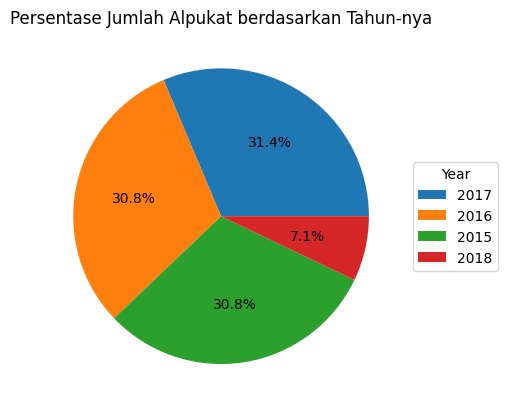

In [36]:
plt.title("Persentase Jumlah Alpukat berdasarkan Tahun-nya")
values = df['Year'].value_counts().values
labels = df['Year'].value_counts().index
plt.pie(df['Year'].value_counts().values,autopct='%1.1f%%')
plt.legend(labels, title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<ipython-input-37-4ceba835dd47>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AveragePrice'>

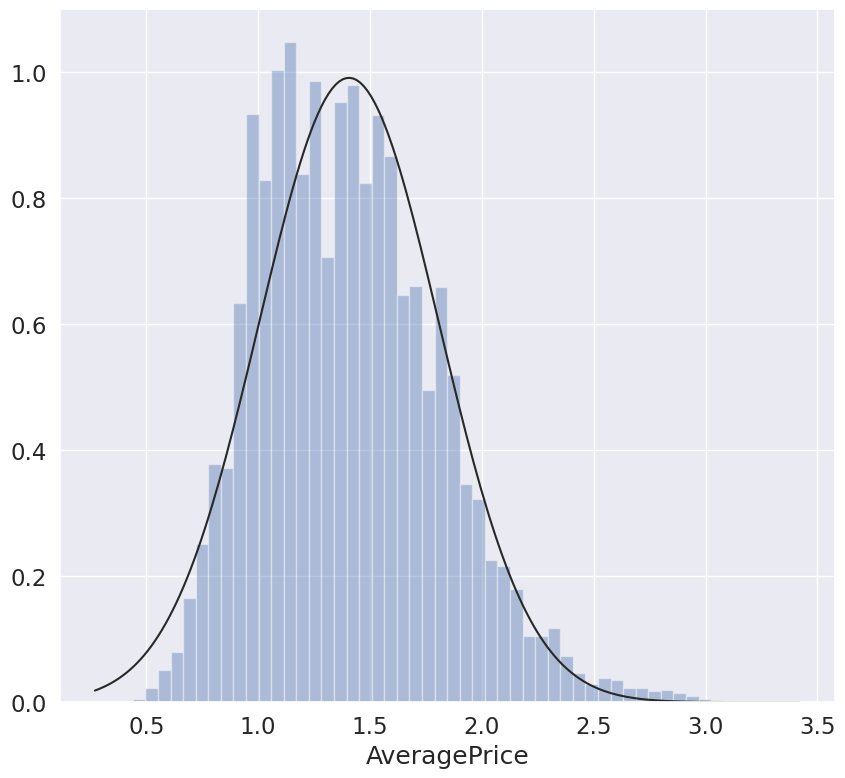

In [37]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

In [38]:
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'L

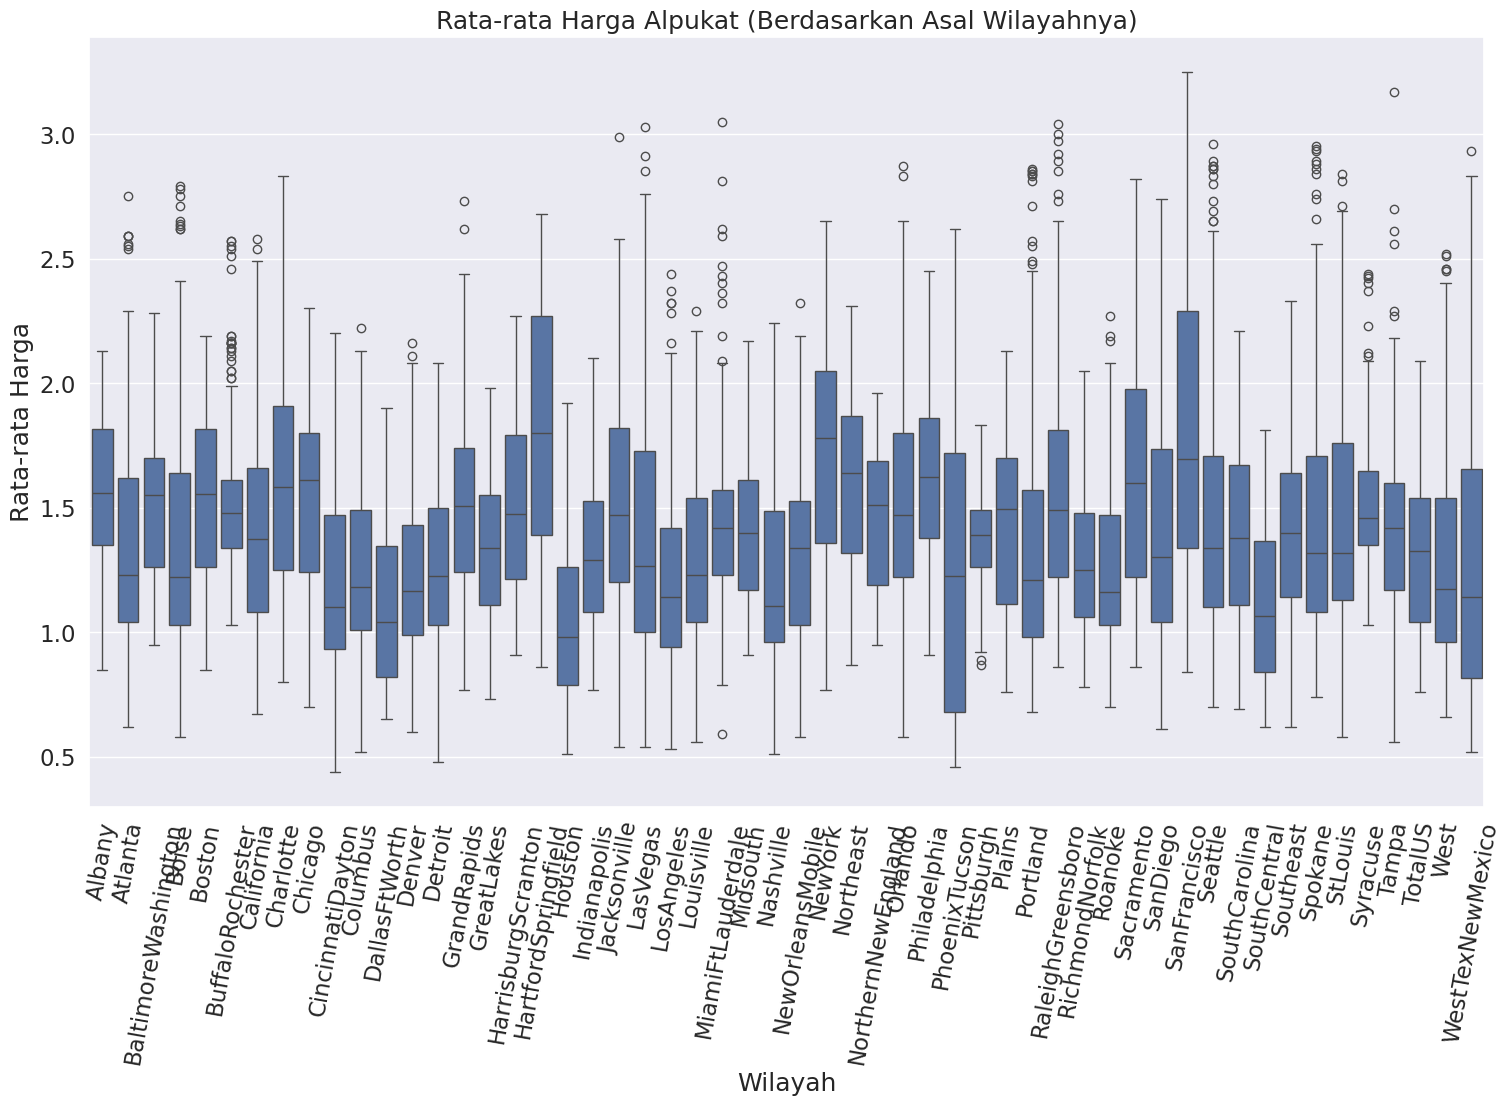

In [39]:
plt.figure(figsize=(18,10))
sns.boxplot(x=df['region'], y=df['AveragePrice']);
plt.title("Rata-rata Harga Alpukat (Berdasarkan Asal Wilayahnya)")
plt.ylabel("Rata-rata Harga")
plt.xlabel("Wilayah")
plt.xticks(rotation=80)

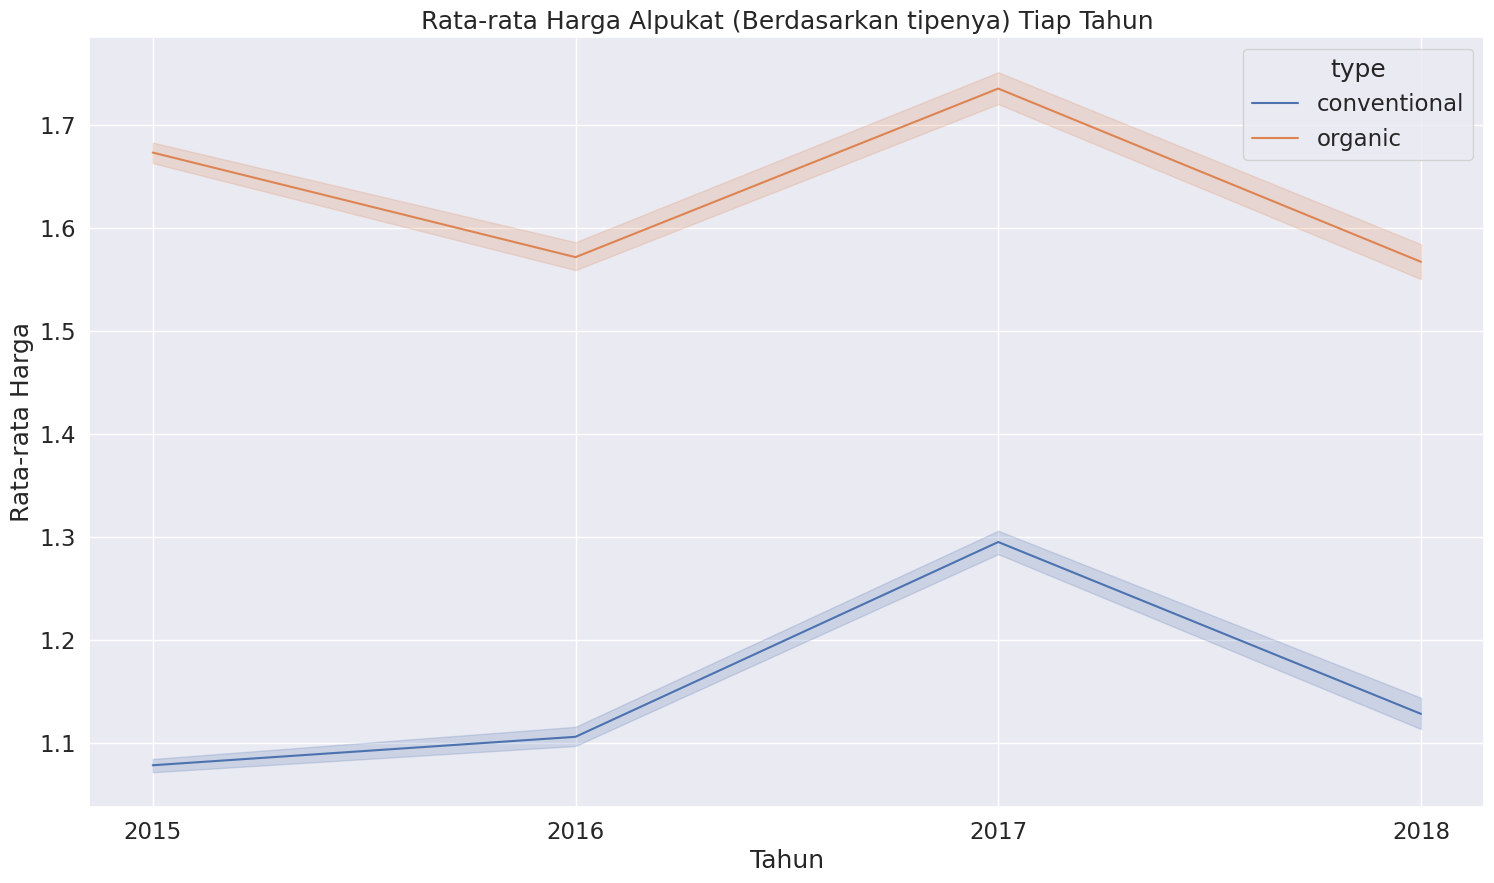

In [40]:
plt.figure(figsize=(18, 10))
sns.lineplot(x="Year", y="AveragePrice", hue='type', data=df)

plt.xticks(df['Year'].unique().astype(int))
plt.title("Rata-rata Harga Alpukat (Berdasarkan tipenya) Tiap Tahun")
plt.ylabel("Rata-rata Harga")
plt.xlabel("Tahun")

plt.show()

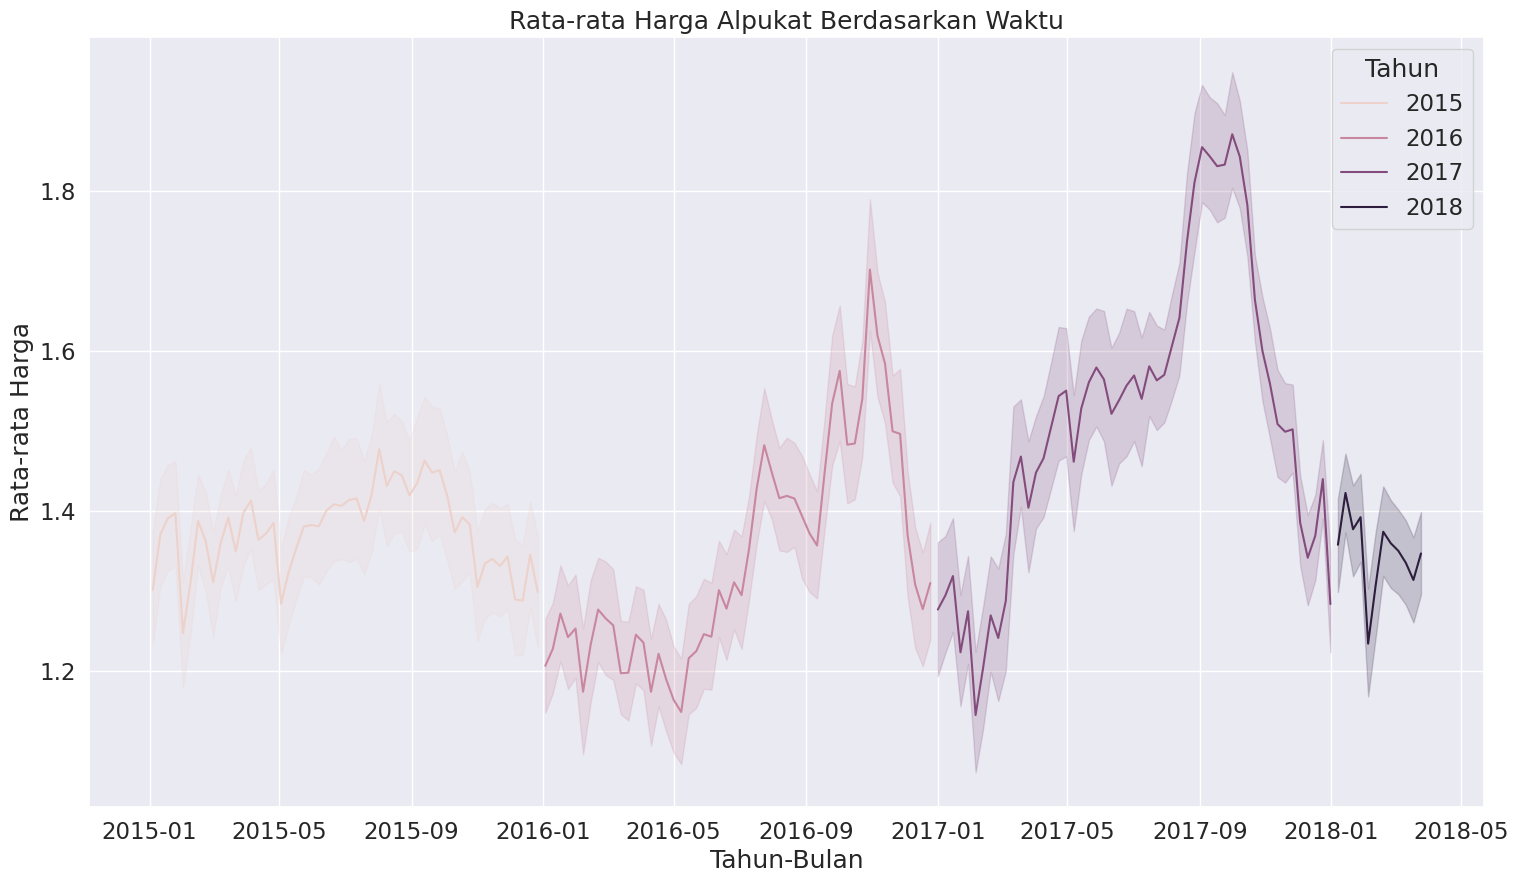

In [42]:
plt.figure(figsize=(18, 10))

sns.lineplot(x="Date", y="AveragePrice", hue='Year', data=df)

plt.title('Rata-rata Harga Alpukat Berdasarkan Waktu')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Rata-rata Harga')
plt.legend(title='Tahun')

plt.show()

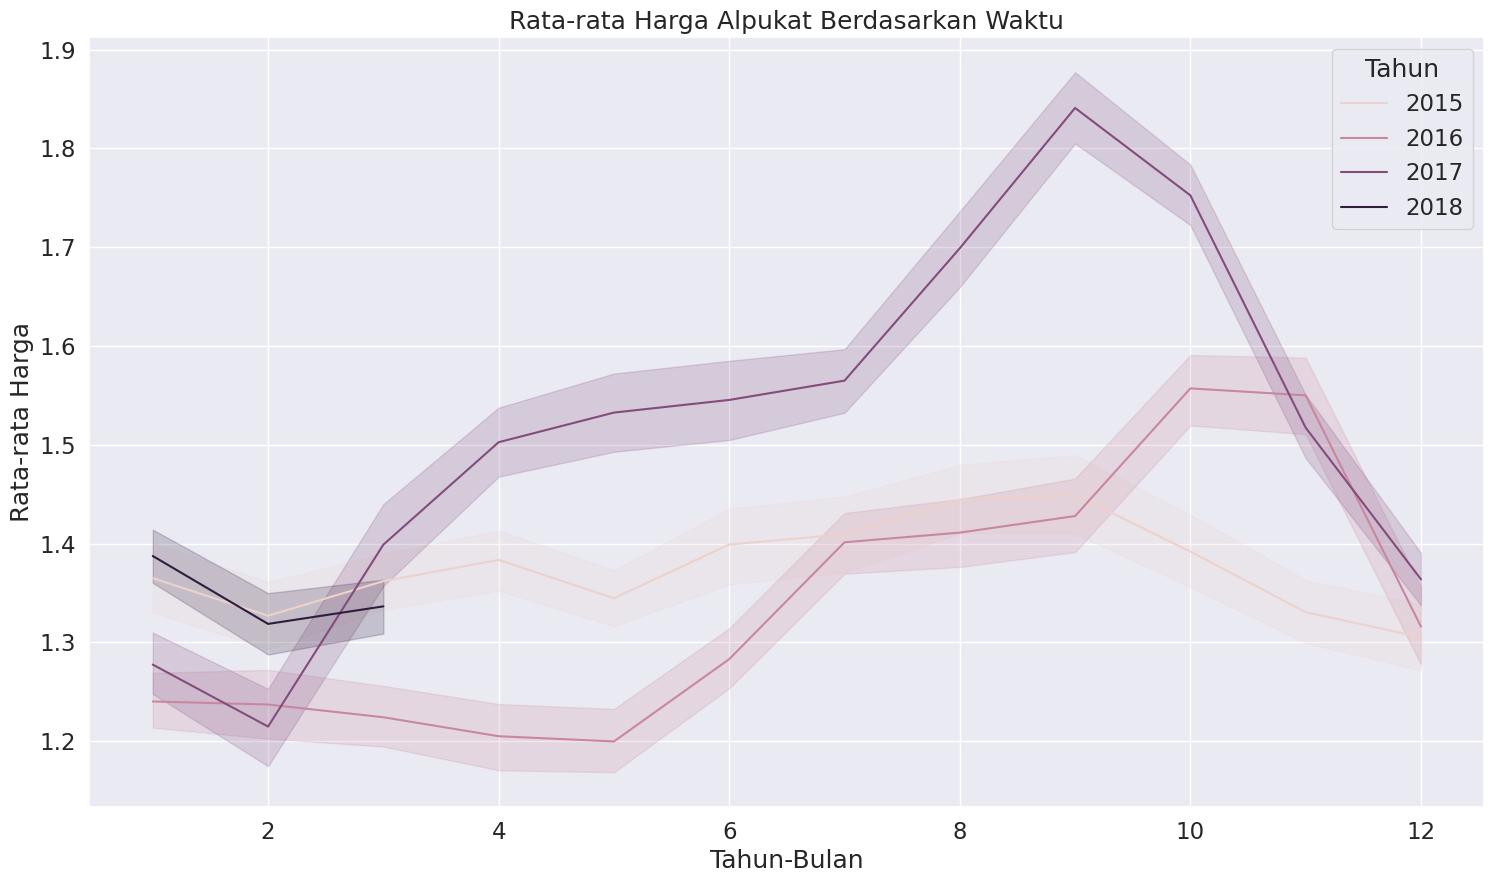

In [43]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='Year',  data=df)

plt.title('Rata-rata Harga Alpukat Berdasarkan Waktu')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Rata-rata Harga')
plt.legend(title='Tahun')

plt.show()

<Axes: xlabel='Year'>

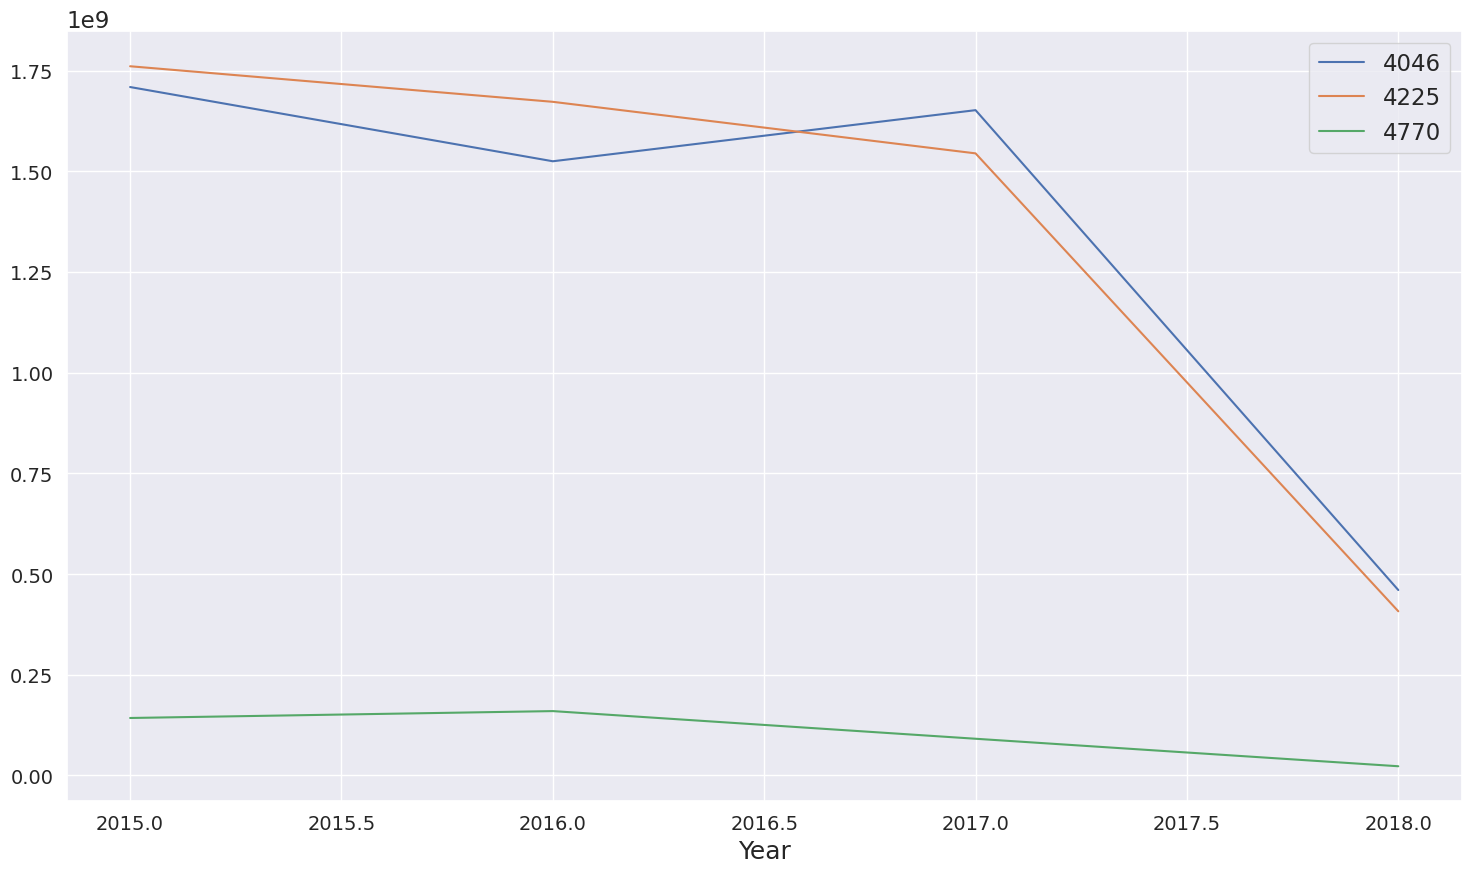

In [44]:
variant = df[['4046', '4225', '4770']].groupby(df.Year).sum()
variant.plot(kind='line', fontsize = 14, figsize=(18, 10))

([<matplotlib.axis.XTick at 0x78a19d6d8750>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018')])

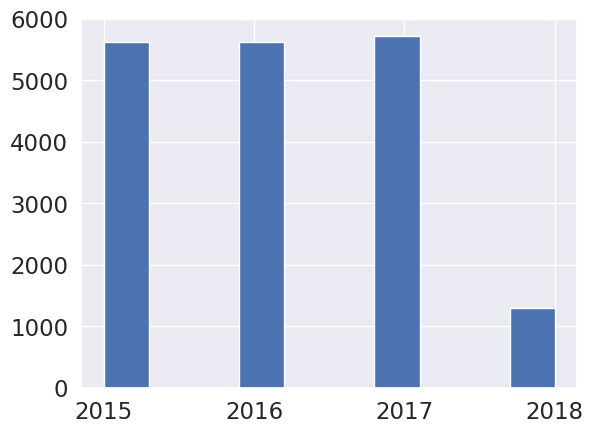

In [48]:
plt.hist(df['Year'])
plt.xticks(df['Year'].unique().astype(int))

In [63]:
# Pilih fitur numerik untuk menghitung korelasi
numerical_df = df.select_dtypes(include=['number'])

# Menghitung korelasi nya
correlation_matrix = numerical_df.corr()

# Menampilkan korelasi
print(correlation_matrix)

              Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
Year           -0.171667      0.093197      0.017193  0.003353 -0.009559   
Month          -0.777730      0.162409     -0.024689 -0.025803 -0.022108   
Day         

In [65]:
numerical_df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.777730,-0.088097
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319


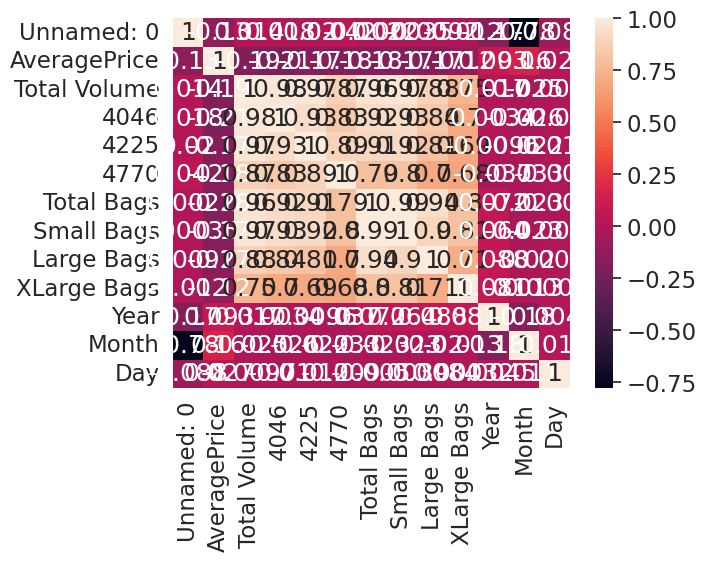

In [66]:
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

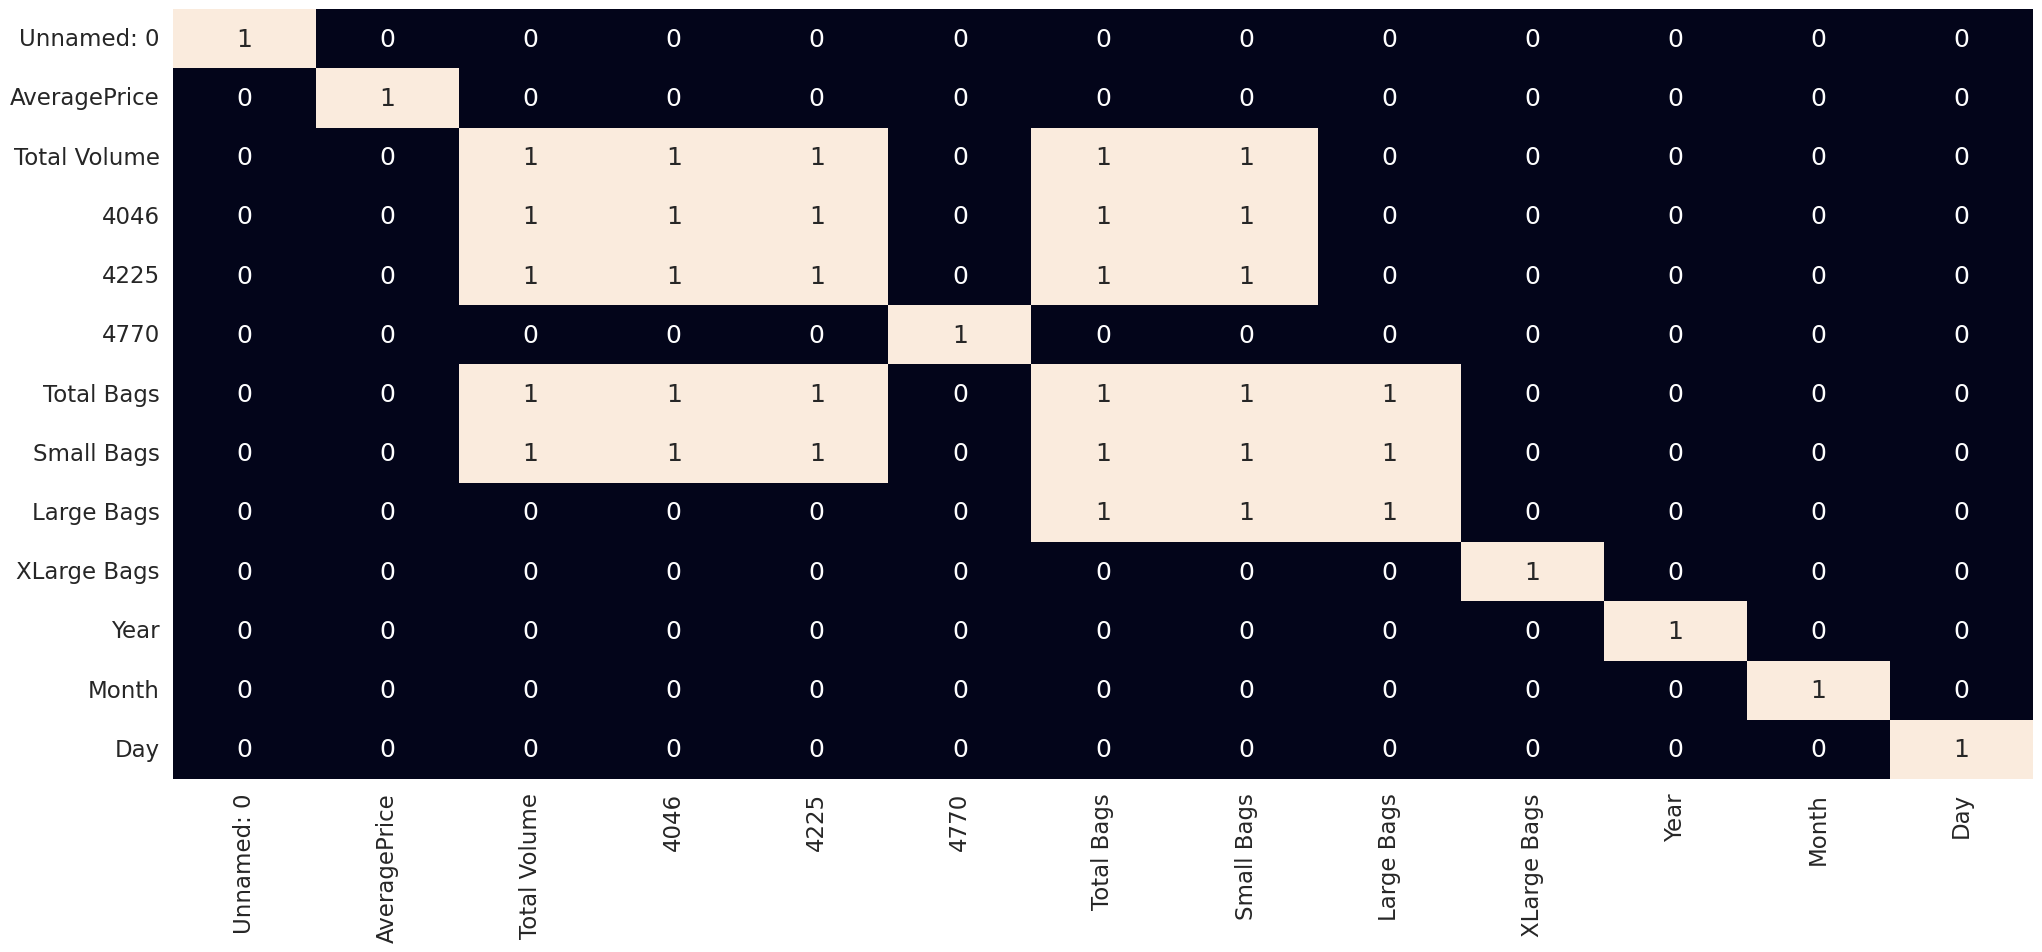

In [67]:
plt.figure(figsize=(24, 10))
sns.heatmap(numerical_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

<Axes: >

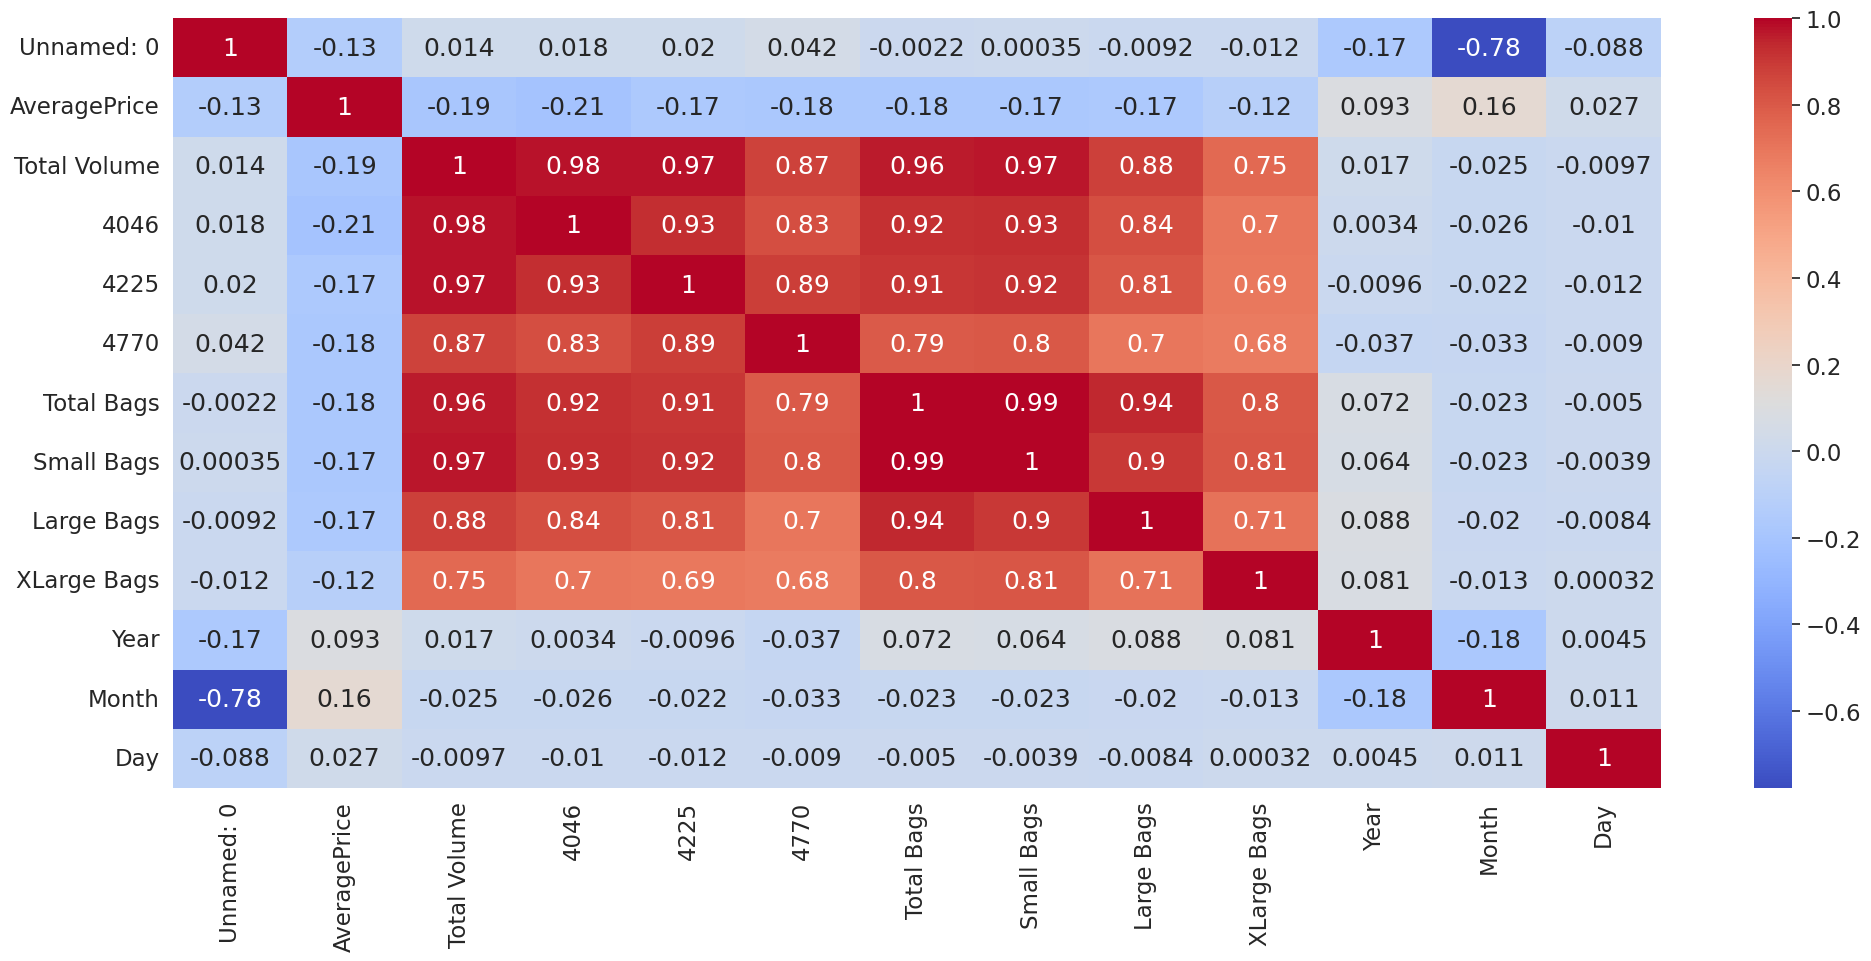

In [69]:
plt.figure(figsize=(24,10))
sns.heatmap(numerical_df.corr(),cmap='coolwarm',annot=True)

In [70]:
# Melakukan Feature Engineering pada categorical Features: "region" dan "types"
df['region'].nunique()

54

In [71]:
df['type'].nunique()

2

In [72]:
# Melakukan pengecekan DataFrame
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


In [73]:
# Menghapus kolom 'region' dan 'tanggal'
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [74]:
df_final.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day,type_organic
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,False
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,False
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,False
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,False
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,False


In [75]:
df_final.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day,type_organic
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,True
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,True
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,True
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,True
18248,11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,True


## ML 1

In [76]:
# Membagi dataset menjadi dua set
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [78]:
# Mengevaluasi performa model regresi
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5.9698973314282255e-15
MSE: 3.6167304404488003e-28
RMSE: 1.901770343771508e-14


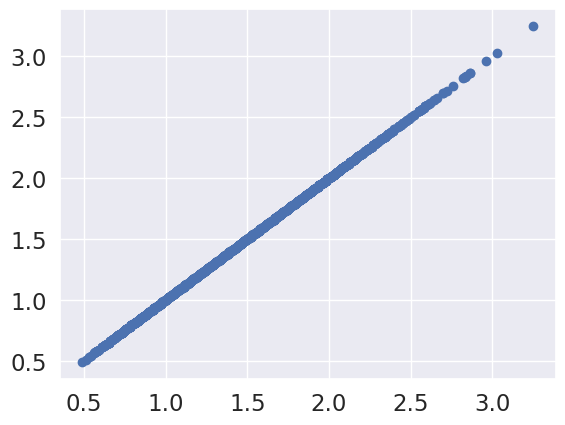

In [79]:
# Membuat scatter plot prediksi
plt.scatter(x=y_test,y=pred)

In [80]:
# Melatih model regresi berbasis Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

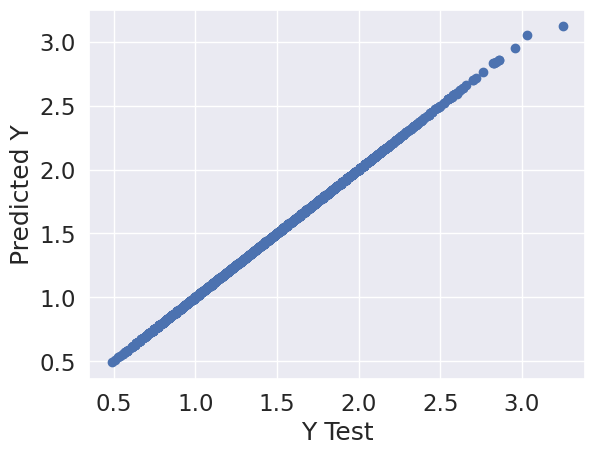

In [81]:
# Menampilkan scatter plot prediksi
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [82]:
# Mengevaluasi performa model regresi
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4.9315068494384655e-05
MSE: 4.821917808219173e-06
RMSE: 0.0021958865654261774


In [83]:
# Melatih model regresi berbasis Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [84]:
# Mengevaluasi performa model regresi
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.775342465929047e-05
MSE: 5.481997260273867e-06
RMSE: 0.002341366536933905


<ipython-input-85-de610fd9e18a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AveragePrice', ylabel='Density'>

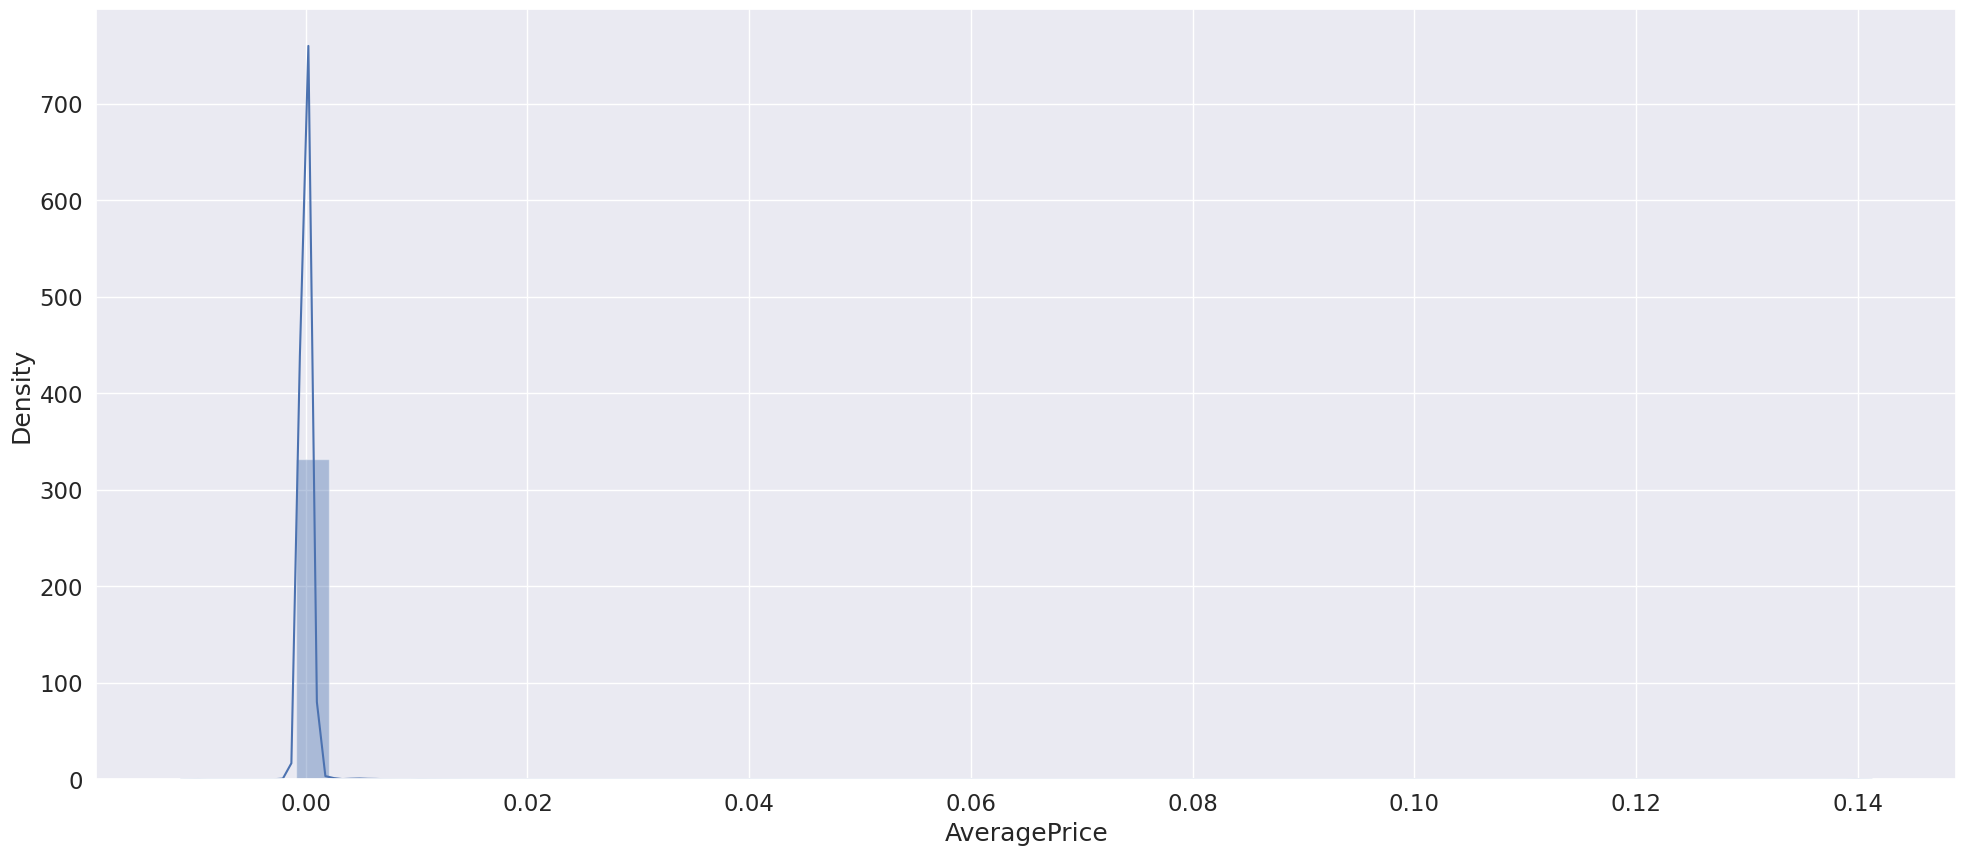

In [85]:
# Membuat distribution plot dari selisih nilai asli dan nilai prediksi
plt.figure(figsize=(24,10))
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
8604,0.82,0.82
2608,0.97,0.97
14581,1.44,1.44
4254,0.97,0.97
16588,1.45,1.45


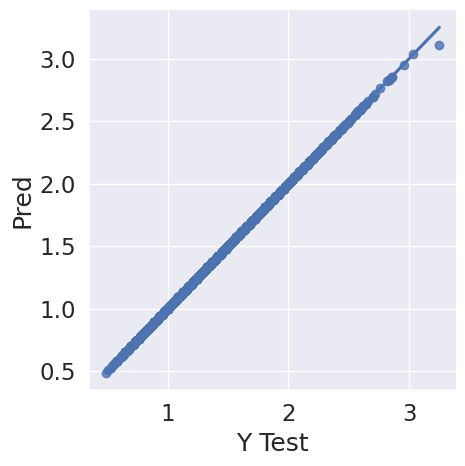

In [86]:
# Membuat perbandingan nilai asli dan nilai prediksi
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## ML 2

In [87]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
# Performance testing
y_pred_Rf = model.predict(X_test)

In [89]:
model.score(X_train, y_train)

0.9999984455839444

In [90]:
model.score(X_test, y_test)

0.9999577106628058

In [91]:
# MSE
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred_Rf)

6.7945890410957635e-06

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [93]:
y_pred = model.predict(X_test)

In [94]:
model.score(X_train, y_train)

0.9999428067019278

In [95]:
model.score(X_test, y_test)

0.9999238097930507

In [96]:
# MSE
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred_Rf)

6.7945890410957635e-06

In [97]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [98]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

In [99]:
reg.score(X_train, y_train)

1.0

In [100]:
reg.score(X_test, y_test)

0.9999778229959957

In [101]:
pred = reg.predict(X_test)
metrics.mean_squared_error(y_test, pred)

3.563158904109539e-06

## ML 3

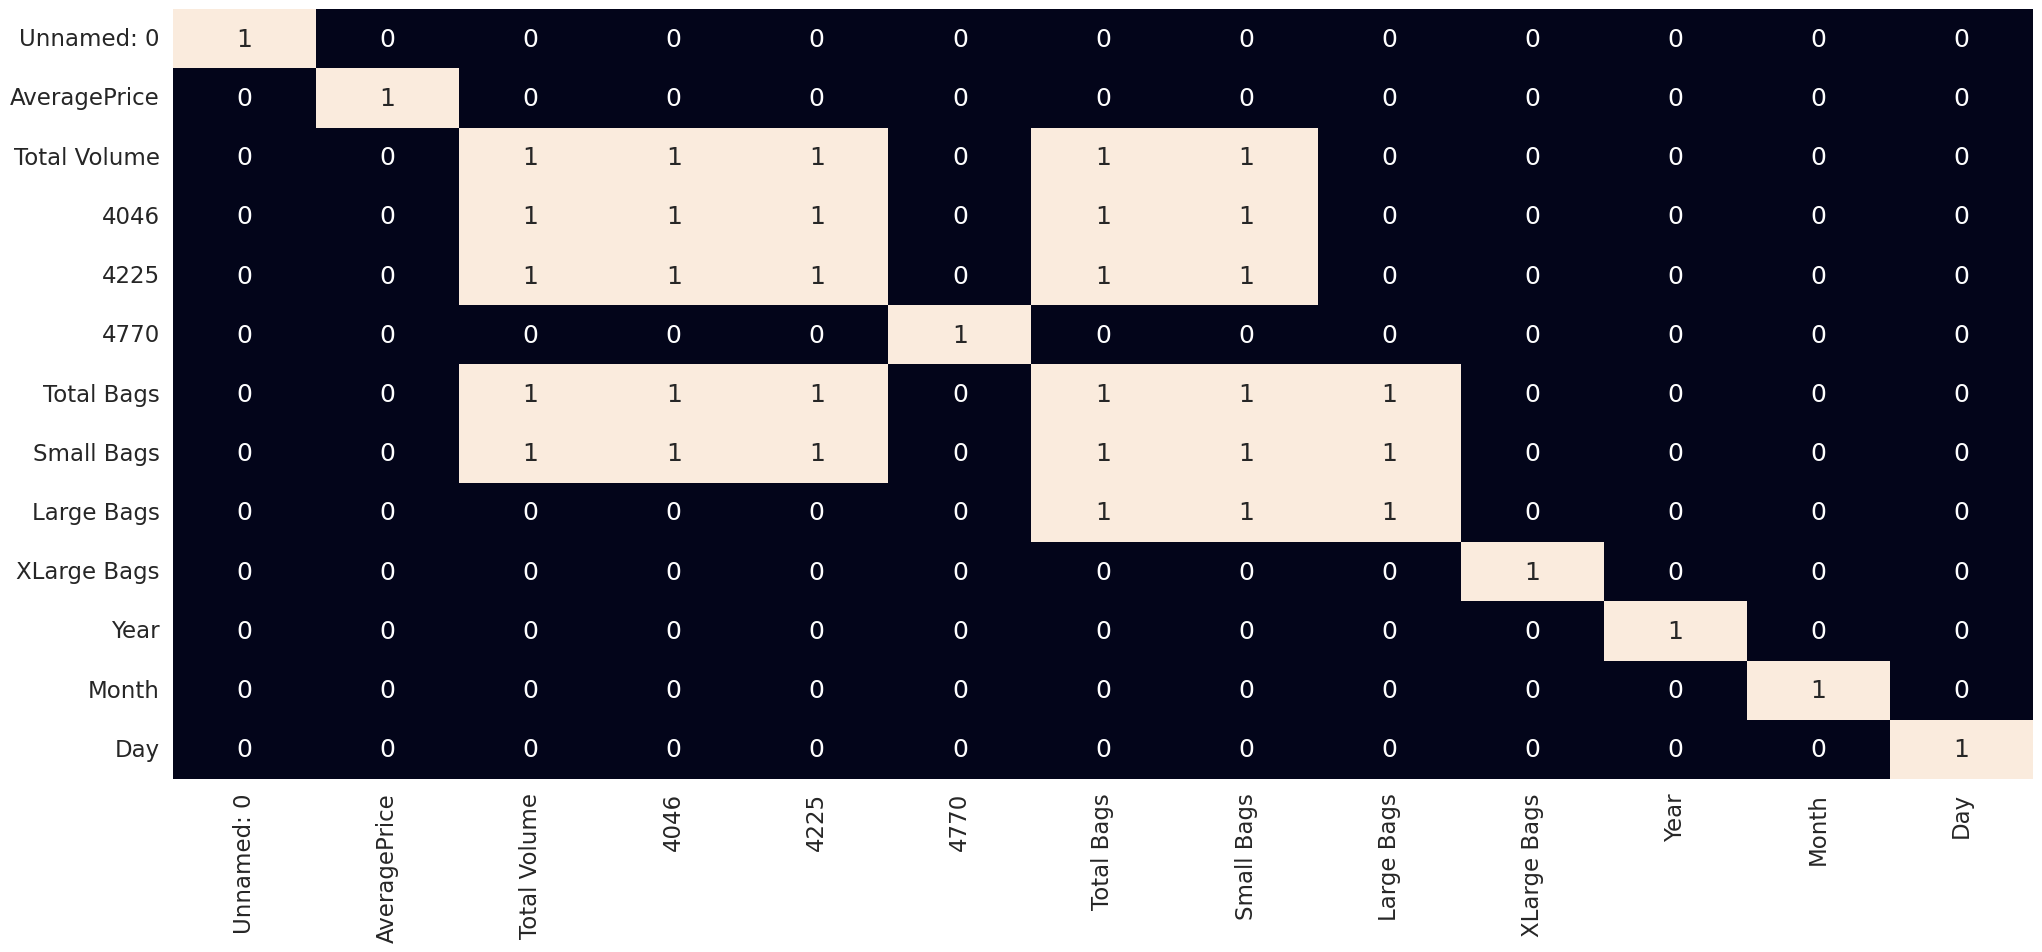

In [103]:
plt.figure(figsize=(24, 10))
sns.heatmap(numerical_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

<ipython-input-106-d0c67f63e767>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




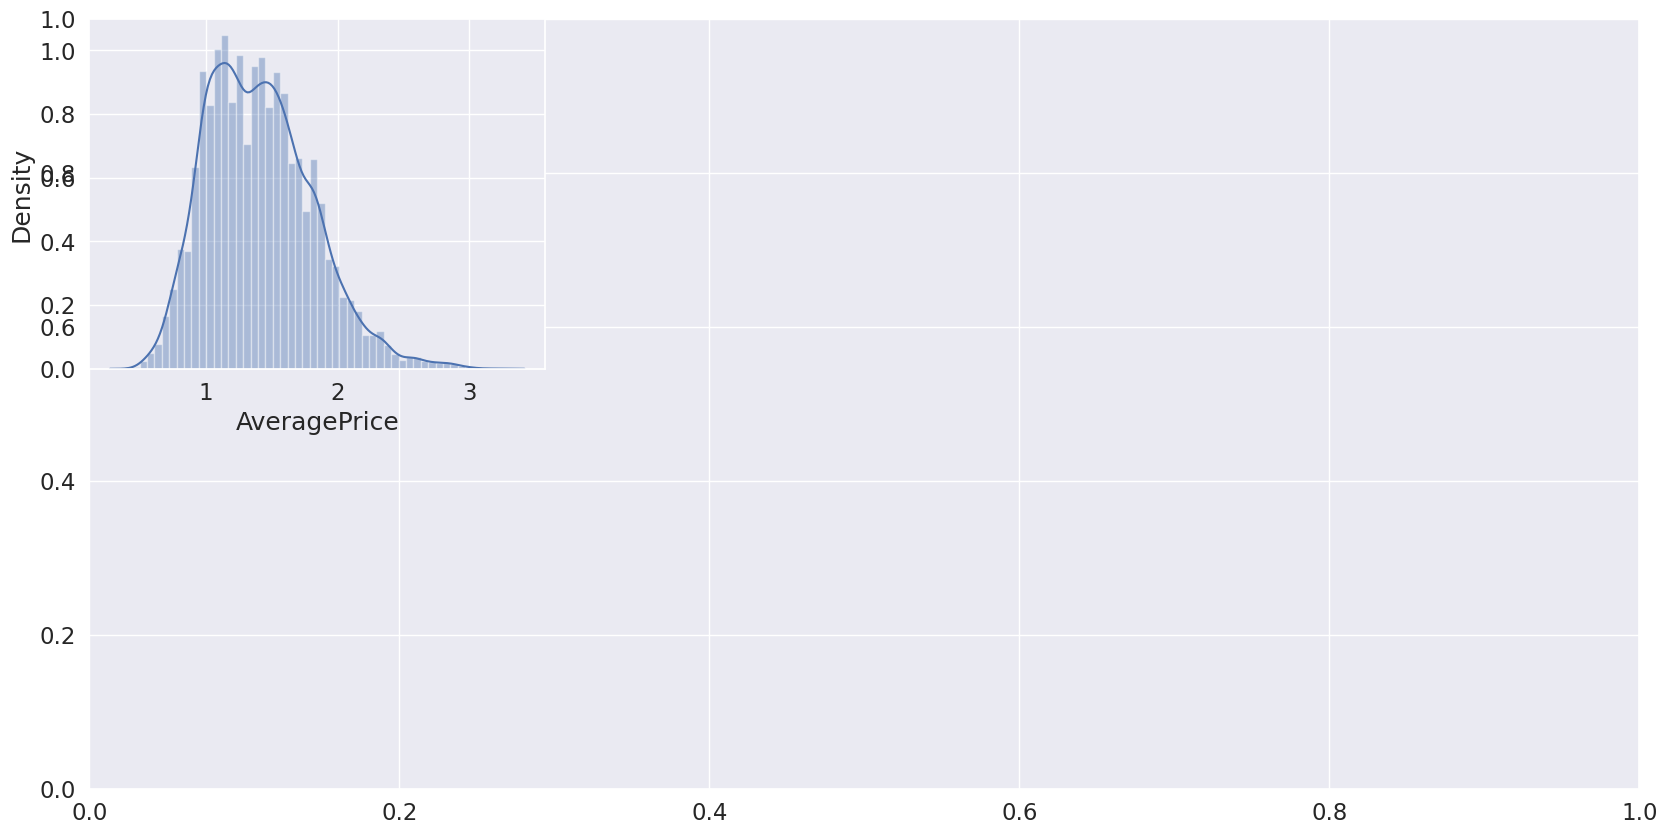

In [106]:
features = ['AveragePrice']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()